In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/student_data.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score


In [7]:
data=pd.read_csv('/kaggle/input/student-performance/student_data.csv')

In [10]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [11]:
label_encoder = LabelEncoder()

In [12]:
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [14]:
for col in categorical:
    data[col] = label_encoder.fit_transform(data[col])

In [15]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [19]:
X = data.drop(['G1', 'G2', 'G3'], axis=1)
y_classification = data['G3']>=8 # Binary Classifictaion: If pass 1, If Fail 0
y_regression = data['G3']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [21]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [22]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Classification Metrics:")
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Classification Metrics:
Confusion Matrix:
 [[ 0 16]
 [ 1 62]]
Accuracy: 0.7848101265822784
Precision: 0.7948717948717948
Recall: 0.9841269841269841


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [24]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)
y_pred_regression_ridge = ridge.predict(X_test)
y_pred_regression_ridge

array([ 3.31213539,  7.7170981 ,  8.78181639, 11.66993022,  8.83620227,
       10.04108291, 11.19734716, 13.24918661,  9.11921151, 11.57852329,
       13.47419491, 10.95068852, 10.37870314, 12.52681611, 10.97807155,
       11.20983728, 10.88719034,  9.94295317, 10.42573655,  9.68995161,
       10.43724194, 11.819962  , 11.6621375 , 10.56122033, 11.81486018,
       14.4435009 , 12.72003837, 13.94676804, 11.35039327, 14.40539597,
       10.41201494, 10.6307725 , 12.82924045, 10.43421704, 10.79203655,
       10.97036988,  5.69672862, 10.97421347, 11.70088443,  6.7587326 ,
        4.27766384, 10.6645481 , 10.82948658,  6.79088945, 10.70049539,
       10.92609064, 11.23268627,  8.53066687, 10.30108282, 12.23188463,
        9.95094884, 13.00116853, 14.21625836, 12.39307627,  8.78699229,
        8.28360732, 12.92295091,  9.76347762, 14.17876637, 12.53152245,
       12.99267765, 10.66341029,  0.46153931, 12.0906744 ,  6.03297118,
        8.73901957,  7.47751673, 11.14663848,  9.79198981, 14.61

In [25]:
rf_regression = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regression.fit(X_train, y_train)
y_pred_regression_rf = rf_regression.predict(X_test)
y_pred_regression_rf

array([ 9.67,  9.46, 10.52, 12.04, 10.13,  9.44, 14.78, 11.29,  9.25,
       12.68, 12.86, 12.54, 11.49,  9.64, 11.13, 10.01, 10.81, 10.28,
        8.49,  6.36, 12.61, 11.21, 10.65,  9.16, 10.61, 11.79, 12.49,
       11.12, 11.8 , 12.55, 10.26, 11.01, 13.43, 11.47, 11.02,  9.33,
        1.49, 12.52, 12.4 , 10.15,  8.67, 11.22, 12.17,  9.42, 11.56,
       12.42, 10.71,  9.38, 12.41, 12.91,  9.73, 14.53, 11.75, 11.16,
       11.61, 10.97, 11.82,  8.59, 12.17, 12.81, 13.22, 11.42,  9.45,
       12.77, 10.33, 10.57, 10.42, 10.85, 11.06, 11.58, 10.58, 11.24,
       12.41, 15.15,  9.21, 11.15, 13.48, 12.62,  8.67])

In [26]:
mse_ridge = mean_squared_error(y_test, y_pred_regression_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_regression_ridge)
ridge_r2 = r2_score(y_test, y_pred_regression_ridge)

mse_rf = mean_squared_error(y_test, y_pred_regression_rf)
mae_rf = mean_absolute_error(y_test, y_pred_regression_rf)
rf_r2 = r2_score(y_test, y_pred_regression_rf)

print("\nRegression Metrics (Ridge)")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", ridge_r2)

print("\nRegression Metrics (Random Forest)")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", rf_r2)


Regression Metrics (Ridge)
Mean Squared Error: 18.482569672823853
Mean Absolute Error: 3.4900849909487652
R-squared: 0.0986331593778823

Regression Metrics (Random Forest)
Mean Squared Error: 13.826345569620255
Mean Absolute Error: 2.995822784810126
R-squared: 0.3257101342481168


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
train_accuracy = []
test_accuracy = []
# Predict on training data
y_train_pred = clf.predict(X_train)

# Predict on testing data
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores and append to the lists
train_accuracy.append(accuracy_score(y_train, y_train_pred))
test_accuracy.append(accuracy_score(y_test, y_test_pred))

print("Overfit Check for Classifier Model")
print(test_accuracy)
print(train_accuracy)

if(test_accuracy < train_accuracy):
    print("Overfitting Condition!") 
    print("Overfit Check for Reggression Model")
    print(test_accuracy)
    print(train_accuracy)

if(test_accuracy < train_accuracy):
    print("Overfitting Condition!")


Overfit Check for Classifier Model
[0.0]
[0.10443037974683544]
Overfitting Condition!
Overfit Check for Reggression Model
[0.0]
[0.10443037974683544]
Overfitting Condition!


In [28]:
cv_scores = cross_val_score(clf, X, y_classification, cv=5)
print("Cross-Validation scores (Classification):", cv_scores)
print("Mean CV Accuracy (Classification):", np.mean(cv_scores))

Cross-Validation scores (Classification): [0.82278481 0.82278481 0.83544304 0.83544304 0.82278481]
Mean CV Accuracy (Classification): 0.8278481012658228


In [29]:
cv_scores_ridge = cross_val_score(ridge, X, y_regression, cv=5)  # 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_regression, X, y_regression, cv=5)  # 5-fold cross-validation
print("\nCross-validation scores (Ridge Regression):", cv_scores_ridge)
print("Mean CV R-squared (Ridge Regression):", np.mean(cv_scores_ridge))
print("\nCross-validation scores (Random Forest Regression):", cv_scores_rf)
print("Mean CV R-squared (Random Forest Regression):", np.mean(cv_scores_rf))


Cross-validation scores (Ridge Regression): [ 0.14344295  0.11687367  0.08861623 -0.05655458 -0.03624803]
Mean CV R-squared (Ridge Regression): 0.05122604773495265

Cross-validation scores (Random Forest Regression): [-0.14166268  0.23406339  0.25146344  0.05142329  0.05356707]
Mean CV R-squared (Random Forest Regression): 0.08977090204079737


In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [33]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [34]:
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [35]:
accuracy = accuracy_score(y_classification, cluster_labels)
print("Accuracy of K-means Clustering:", accuracy)

Accuracy of K-means Clustering: 0.28860759493670884


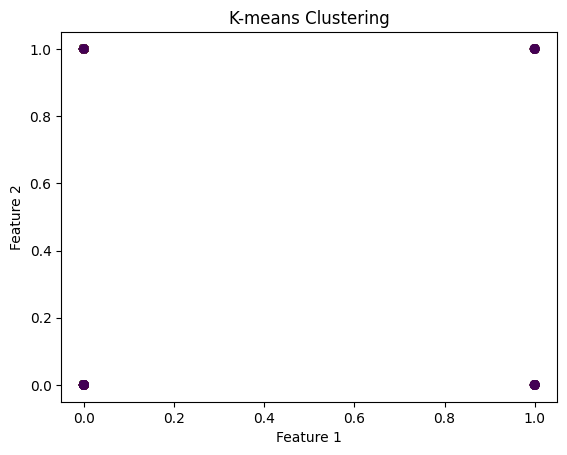

In [36]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()